In [1]:
from data import load_data, GS_Dataset, make_gs_dataset
from model import Narx, DEVICE
from util_fun import train_narx_simval, narx_sim_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
n_a=15
n_b=25
n_layers=5
n_nodes=50
n_epochs=15000

In [3]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)

In [4]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [5]:
results = train_narx_simval(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 1.0071623970009707, previous best pred NRMS: inf 

current best sim NRMS: 1.0136831647655997, previous best sim NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.05863964653924562, previous best pred NRMS: 1.0071623970009707 

current best sim NRMS: 0.11521430939453454, previous best sim NRMS: 1.0136831647655997 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.0415755542679525, previous best pred NRMS: 0.05863964653924562 

current best sim NRMS: 0.09902814615938015, previous best sim NRMS: 0.11521430939453454 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.03532158272346999, previous best pred NRMS: 0.0415755542679525 

current best sim NRMS: 0.09072943159625847, previous best sim NRMS: 0.09902814615938015 

Checkpoint at epoch 2401:  

current pred NRMS: 0.035347445871603246, current best pred NRMS: 0.03532158272346999 

current best sim NRMS: 0.08356643062934356, previous best sim NRMS: 0.090729431596

In [6]:
torch.save(results.best_sim_model.state_dict(), f'narx{n_epochs//1000}K_na{n_a}_nb{n_b}_nlay{n_layers}_nnode{n_nodes}_sim')

In [7]:
_,y_true,ylist,nrms=narx_sim_nrms(results.best_sim_model, n_a, n_b, x_data, y_data, True, DEVICE, 5000)
_,_,_,nrms_val=narx_sim_nrms(results.best_sim_model, n_a, n_b, data.x_data_val, data.y_data_val, True, DEVICE, 5000)
f'val:{nrms_val:.2%} all:{nrms:.2%}'

'val:4.82% all:3.10%'

Text(0, 0.5, 'Angle [rad]')

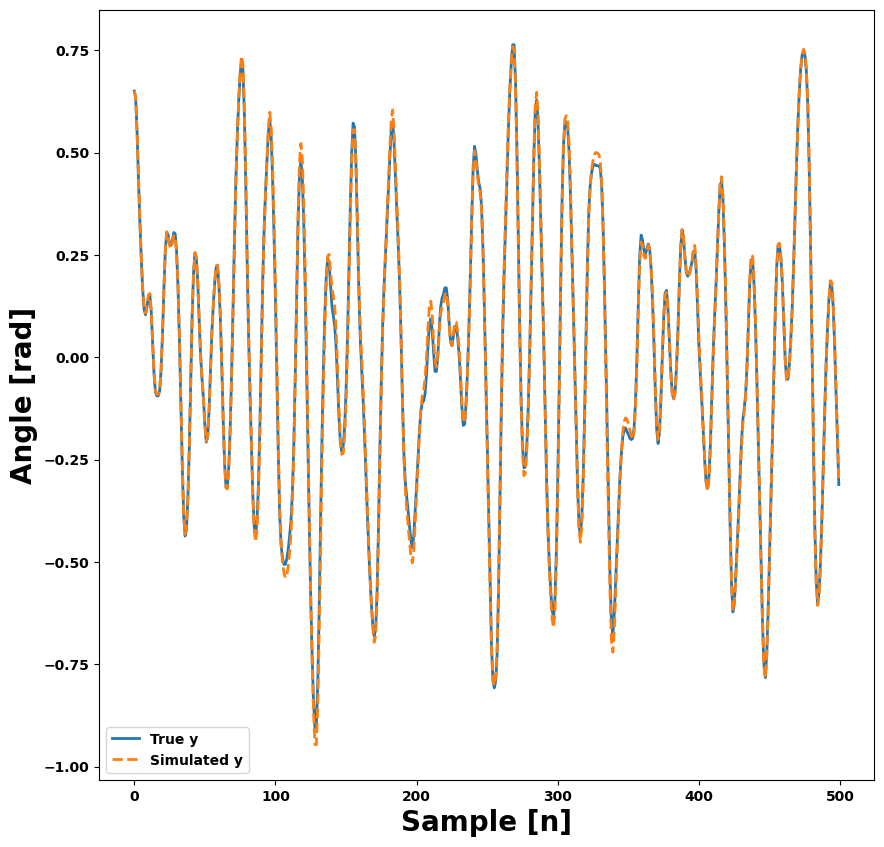

In [8]:
start=0
end=500
fs=20
plt.figure(figsize=(10,10))
plt.plot(y_true[start:end], label='True y', lw=2)
plt.plot(ylist[start:end], label='Simulated y', ls='--', lw=2)
plt.legend()
plt.xlabel('Sample [n]',fontsize=fs)
plt.ylabel('Angle [rad]',fontsize=fs)